In [2]:
from __future__ import division
import numpy as np
import sys
import zipfile
import logging
import imageio
import glob
import matplotlib.pyplot as plt
%matplotlib inline

Loading png

In [2]:
png = []

for im_path in glob.glob("/Users/aliciahorsch/Anaconda/DL challenge/train/png/*.png"):
    im = imageio.imread(im_path)
    png.append(im)

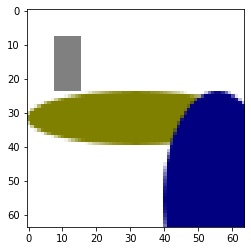

In [3]:
plt.imshow(png[0])

#4th channel is transparency, 1-3 is RGB

In [5]:
png=np.array(png)
print(png.shape)

(48000, 64, 64, 4)


In [7]:
np.save("png.npy", png)

In [8]:
print(png.shape)

(48000, 64, 64, 4)


In [9]:
X = np.load("png.npy")

In [12]:
print(X.shape)

(48000, 64, 64, 4)


Load svg file

In [14]:
def load(path, zipped=True):
    js = range(48000)
    strings = []
    if zipped:
        with zipfile.ZipFile(path) as z:
            for j in js:
                strings.append(z.open("{}.svg".format(j)).read())
    else:
        for j in js:
                strings.append(open("{}/{}.svg".format(path, j)).read())
                
    return strings

In [15]:
svg = load("/Users/aliciahorsch/Anaconda/DL Challenge/train/svg/", zipped = False)

Process svg to array

In [16]:
from nltk.tokenize import SpaceTokenizer

tk = SpaceTokenizer()

test = tk.tokenize(svg[677])
print(test)

['<?xml', 'version="1.0"', 'encoding="utf-8"', '?>\n<svg', 'baseProfile="full"', 'height="64"', 'version="1.1"', 'width="64"', 'xmlns="http://www.w3.org/2000/svg"', 'xmlns:ev="http://www.w3.org/2001/xml-events"', 'xmlns:xlink="http://www.w3.org/1999/xlink"><defs', '/><ellipse', 'cx="8.0"', 'cy="56.0"', 'fill="olive"', 'rx="16.0"', 'ry="8.0"', '/><ellipse', 'cx="32.0"', 'cy="56.0"', 'fill="fuchsia"', 'rx="16.0"', 'ry="16.0"', '/></svg>']


In [17]:
tokens = []
for sequence in svg:
    l = tk.tokenize(sequence)
    tokens.append(l)

print(len(tokens))
print(tokens[:1])

48000
[['<?xml', 'version="1.0"', 'encoding="utf-8"', '?>\n<svg', 'baseProfile="full"', 'height="64"', 'version="1.1"', 'width="64"', 'xmlns="http://www.w3.org/2000/svg"', 'xmlns:ev="http://www.w3.org/2001/xml-events"', 'xmlns:xlink="http://www.w3.org/1999/xlink"><defs', '/><ellipse', 'cx="32.0"', 'cy="8.0"', 'fill="silver"', 'rx="16.0"', 'ry="16.0"', '/><ellipse', 'cx="32.0"', 'cy="56.0"', 'fill="green"', 'rx="32.0"', 'ry="16.0"', '/><ellipse', 'cx="8.0"', 'cy="8.0"', 'fill="green"', 'rx="16.0"', 'ry="32.0"', '/></svg>']]


In [18]:
maxi = 0
for file in tokens:
    length = len(file)
    if length > maxi:
        maxi = length
    else:
        continue
print(maxi)

66


In [19]:
dic = {}
counter = 1

for tokenlist in tokens:
    for token in tokenlist:
        if token in dic:
            continue
        else:
            dic[token] = counter
            counter +=1
            
print(dic)
print(len(dic))

{'<?xml': 1, 'version="1.0"': 2, 'encoding="utf-8"': 3, '?>\n<svg': 4, 'baseProfile="full"': 5, 'height="64"': 6, 'version="1.1"': 7, 'width="64"': 8, 'xmlns="http://www.w3.org/2000/svg"': 9, 'xmlns:ev="http://www.w3.org/2001/xml-events"': 10, 'xmlns:xlink="http://www.w3.org/1999/xlink"><defs': 11, '/><ellipse': 12, 'cx="32.0"': 13, 'cy="8.0"': 14, 'fill="silver"': 15, 'rx="16.0"': 16, 'ry="16.0"': 17, 'cy="56.0"': 18, 'fill="green"': 19, 'rx="32.0"': 20, 'cx="8.0"': 21, 'ry="32.0"': 22, '/></svg>': 23, 'fill="maroon"': 24, 'ry="8.0"': 25, 'cy="32.0"': 26, 'fill="cyan"': 27, 'rx="8.0"': 28, '/><rect': 29, 'fill="olive"': 30, 'height="16.0"': 31, 'width="16.0"': 32, 'x="32.0"': 33, 'y="56.0"': 34, 'fill="navy"': 35, 'fill="purple"': 36, 'height="32.0"': 37, 'width="32.0"': 38, 'x="8.0"': 39, 'y="32.0"': 40, 'fill="red"': 41, 'x="56.0"': 42, 'cx="56.0"': 43, 'fill="lime"': 44, 'fill="teal"': 45, 'y="8.0"': 46, 'width="8.0"': 47, 'height="8.0"': 48, 'fill="white"': 49, 'fill="magenta"': 5

In [20]:
r = np.zeros((len(tokens),maxi,len(dic)))
print(r.shape)
l = np.zeros((maxi,len(dic)))
print(l.shape)

(48000, 66, 56)
(66, 56)


In [21]:
z = []
aux =[]

for tokenlist in tokens:
    
    for token in tokenlist:
        aux.append(dic[token])
    
    while len(aux) < 66:
        aux.append(0)
    n = np.array(aux)
    
    z.append(aux)
    aux = []


In [22]:
print(len(z))
print(z[0])

48000
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 12, 13, 18, 19, 20, 17, 12, 21, 14, 19, 16, 22, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [33]:
a = []

print(l.shape)
for item in z:
    #print(item)
    l = np.zeros((maxi,57))
    for index,value in enumerate(item):
        l[index,value] = 1
        
    a.append(l)

        

(66, 57)


In [34]:
f = np.array(a)
print(f.shape)

(48000, 66, 57)


In [35]:
np.save("svg.npy", f)

In [36]:
y = np.load("svg.npy")

In [37]:
print(y.shape)

(48000, 66, 57)


In [40]:
print(y[0][18])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
